# Predicting H1N1 Vaccination Status

**Authors**: Czarina Luna, Weston Shuken, Justin Sohn

January 2022

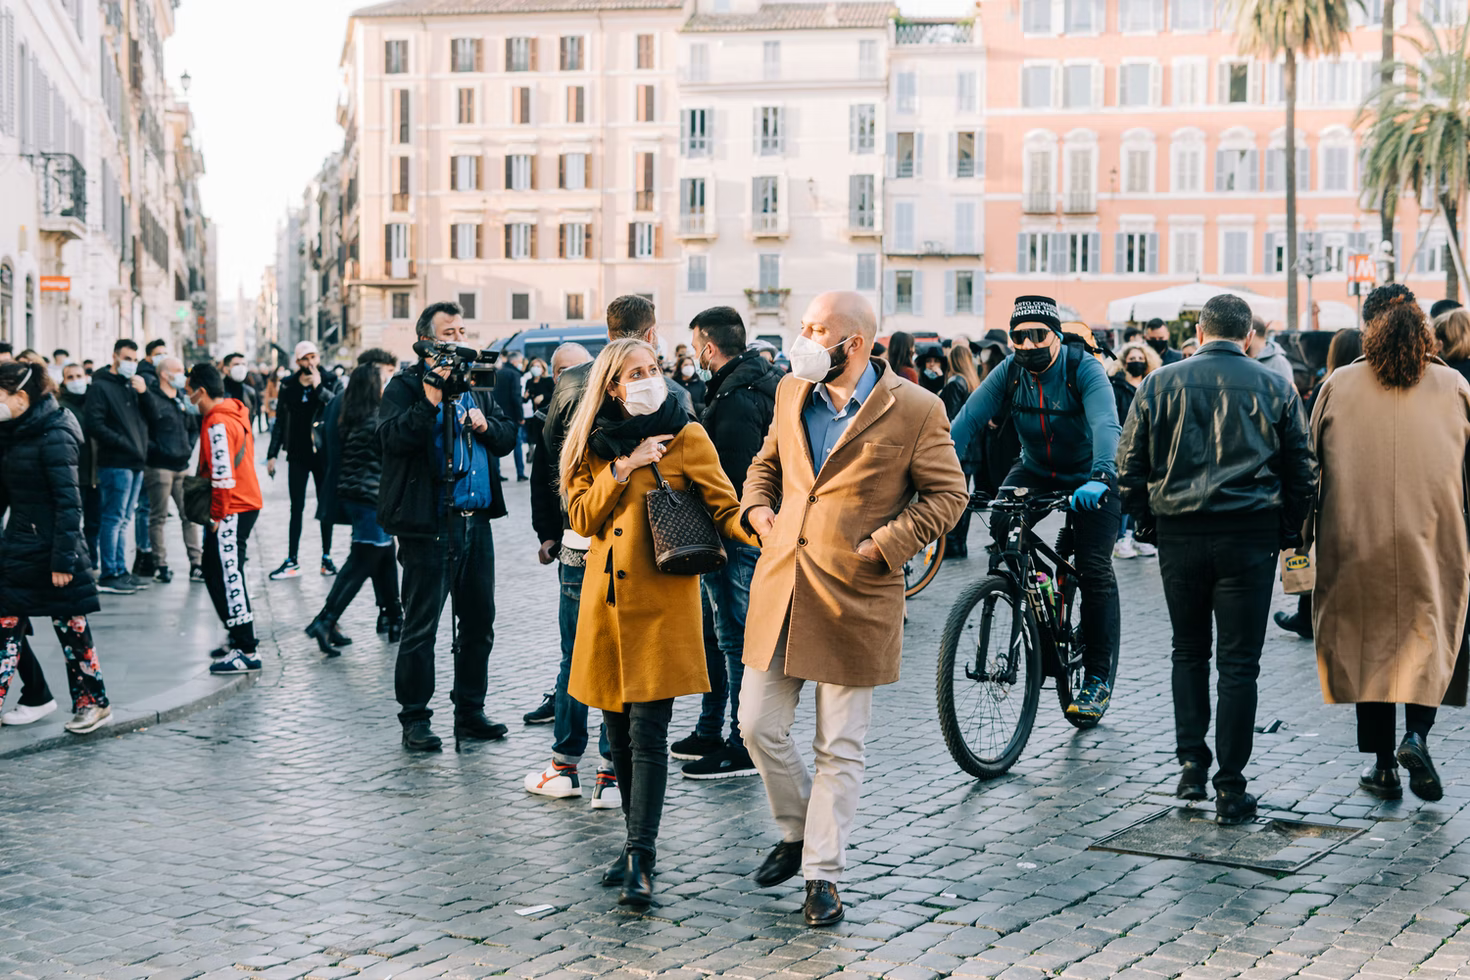

# Table of Contents
* [1 Overview](#Overview)
* [2 Business Problem](#Business_Problem)
* [3 Data Understanding](#Data_Understanding)
* [4 Data Exploration](#Data_Exploration)
* [5 Data Modeling](#Data_Modeling)    
    * [5.1 Baseline Model](#Baseline_Model)
    * [5.2 Machine Learning Pipeline](#Pipeline)
    * [5.3 Hyperparameter Tuning](#Hyperparameter_Tuning)
* [6 Final Model](#Final_Model)
* [7 Final Evaluation](#Final_Evaluation)
* [8 Conclusion](#Conclusion)
* [9 Next Steps](#Next_Steps)
* [10 Contact Us](#Contact)

# 1. Overview <a class="anchor" id="Overview"></a>
A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

# 2. Business Problem <a class="anchor" id="Business_problem"></a>
Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

# 3. Data Understanding <a class="anchor" id="Data_Understanding"></a>
Describe the data being used for this project.

# 4. Data Exploration <a class="anchor" id="Data_Exploration"></a>
Describe and justify the process for preparing the data for analysis.

In [1]:
# Import Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the data sets and merge labels with features
labels = pd.read_csv('data/training_set_labels.csv')
features = pd.read_csv('data/training_set_features.csv')
data = pd.merge(features, labels, on="respondent_id").drop(columns='respondent_id')

In [3]:
# Assign the target variable for prediction and other target not for prediction
target_variable = 'h1n1_vaccine'
other_target = 'seasonal_vaccine'

In [4]:
# View the first two rows of dataframe
data.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1


In [5]:
# Look at summary of descriptive statistics on numerical variables
data.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [6]:
# Look at the dataset's columns, datatypes, and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [8]:
# Create a table to show class imbalance
imbalance_table = pd.DataFrame(data[target_variable].value_counts())
imbalance_table['percent'] = round(data[target_variable].value_counts(normalize=True), 4)*100

imbalance_table['inoculated'] = 'yes'
imbalance_table.at[0, 'inoculated'] = 'no'

imbalance_table

,h1n1_vaccine,percent,inoculated
0,21033,78.75,no
1,5674,21.25,yes


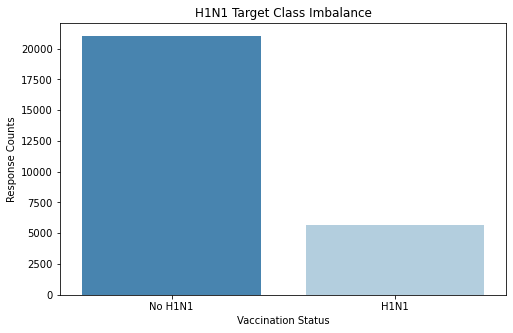

In [9]:
# Visualize the class imbalance of the target variable
no_h1n1 = data[target_variable].value_counts()[0]
yes_h1n1 = data[target_variable].value_counts()[1]

fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(x=['No H1N1', 'H1N1'], y=[no_h1n1, yes_h1n1], palette="Blues_r", ax=ax)

ax.set_ylabel('Response Counts')
ax.set_xlabel('Vaccination Status')
ax.set_title('Target Variable Class Imbalance')

plt.show()

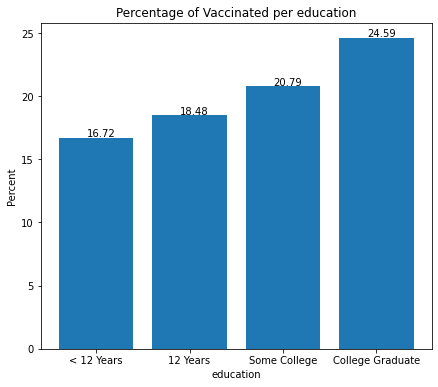

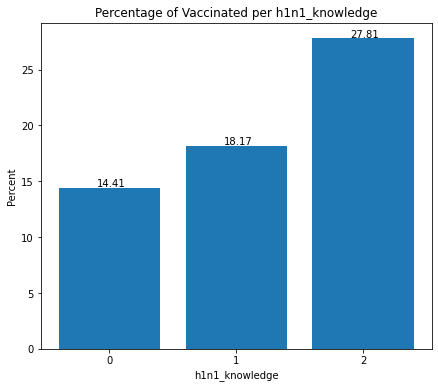

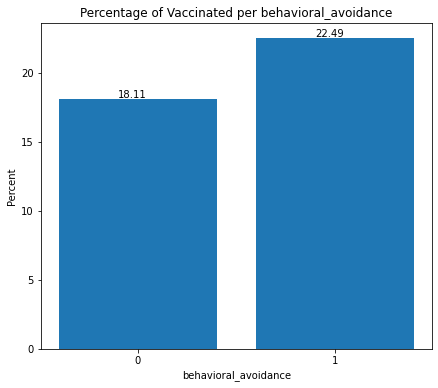

In [13]:
# Create function to plot percentage of vaccinated against features
def plot_percentage(column, df=data, target=target_variable):
    """
    Insert docstring
    """
    ax = plt.subplots(figsize=(7,6))
    
    new_df = df.groupby(column)[target_variable].value_counts(normalize=True).sort_values(ascending=True)
    new_df = new_df.mul(100).rename('Percent').reset_index()

    x = new_df[new_df['h1n1_vaccine'] == 1][column]
    y = new_df[new_df['h1n1_vaccine'] == 1]['Percent']

    plt.xlabel(column)
    plt.ylabel('Percent')
    plt.title(f'Percentage of Vaccinated per {column}')
    plt.xticks(np.arange(0, 4, step=1))

    plt.bar(x=x, height=y, width=0.8)
    
    for index, value in enumerate(y):
        plt.text(index-0.1,value+0.1, str(round(value,2)))
    
    plt.show()

plot_percentage('education')
plot_percentage('h1n1_knowledge')
plot_percentage('behavioral_avoidance')

# >>> Plot any column here

### EDA Takeaways:
- An issue at stake is the massive amount of NaN or Null values in the data. 
- The target variable `seasonal_vaccine` also is imbalanced (47/53).
- The target variable `h1n1_vaccine` also is imbalanced (22/78).

# 5. Data Modeling <a class="anchor" id="Data_Modeling"></a>

In [17]:
# Import Python packages and modules to use 
import time

from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
plot_confusion_matrix, roc_auc_score, plot_roc_curve, roc_curve, PrecisionRecallDisplay, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

# import eli5
# from eli5.sklearn import PermutationImportance

# from pdpbox import pdp

import warnings
warnings.filterwarnings('ignore')

## 5.1 Baseline Model <a class="anchor" id="Baseline_Model"></a>
Our basline model uses logistic regression, drops all NaN/Null values, and uses only numeric features.

In [1]:
# Create function to grab only numerical features
def grab_numeric(df):
    return df.select_dtypes(['float64', 'int64'])

In [19]:
# Create function to split the data into train and test sets, without other target variable
def data_split(df=data, target=target_variable):
    X = df.drop(columns=[target, other_target])
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20211122, stratify=y)
    return X_train, X_test, y_train, y_test

In [20]:
# Create dataframe for baseline model, with only numeric features, and drop missing values
baseline_data = grab_numeric(data).dropna()

# Use the function to split data of baseline dataframe
X_train, X_test, y_train, y_test = data_split(baseline_data)

In [21]:
# Instantiate the baseline classifier and fit to train test
baseline_model = LogisticRegression(random_state=20211122)

baseline_model.fit(X_train, y_train)

# Predict on the test set
baseline_pred = baseline_model.predict(X_test)

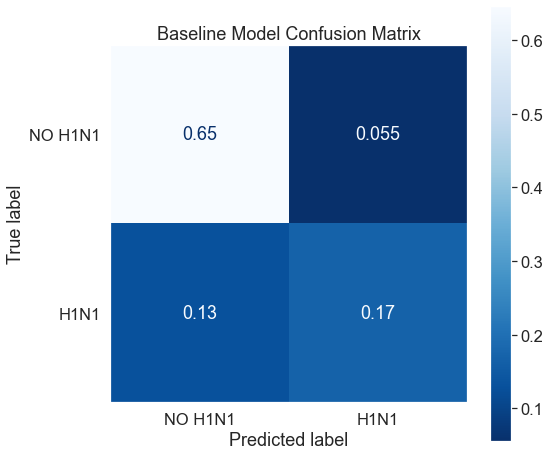

In [23]:
# Plot the confusion matrix of baseline model results
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(baseline_model, X_test, y_test, cmap='Blues_r',
                      display_labels=['NO H1N1', 'H1N1'], ax=ax, normalize='all')
plt.title('Baseline Model Confusion Matrix')
plt.grid(False)
plt.show()

In [74]:
# Create a metric table to record metrics of baseline model and all additional models to run
metric_table = pd.DataFrame(columns = ['Model', 'CV Score', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'])

# Create a function to update metric table
def get_metrics(name, y_test, y_pred):
    cv_score = round(np.median(cross_val_score(pipeline, X_train, y_train, cv=5)), 4)
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    auc_score = round(roc_auc_score(y_test, y_pred), 4)
    
    
    metric_table = metric_table.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall,
                                        'AUC': auc_score
                                    
                     'AUC': round(roc_auc_score(y_test, baseline_pred), 2)}, ignore_index=True)
metric_table

,Model,Accuracy,Precision,Recall,AUC
0,Baseline_LR,0.75,0.81,0.57,0.74


In [75]:
print(f"""
Accuracy on the test set is {round(accuracy_score(y_test, baseline_pred), 2)}.
Recall on the test set is {round(recall_score(y_test, baseline_pred), 2)}.
Precision on the test set is {round(precision_score(y_test, baseline_pred), 2)}.
F1-score on the test is {round(f1_score(y_test, baseline_pred), 2)}.
""")


Accuracy on the test set is 0.81.
Recall on the test set is 0.57.
Precision on the test set is 0.75.
F1-score on the test is 0.65.



## 5.2 Machine Learning Pipeline <a class="anchor" id="Pipeline"></a>
Building a pipeline for an efficient workflow. The pipeline will include catergorical and numeric transformations, standardization of features, mean value for NaN/Null.
The estimators for the pipeline are:
* Logistic Regression
* Decision Tree
* Random Forest
* Extra Trees
* Gradient Boost

In [76]:
GrabNumeric = FunctionTransformer(grab_numeric)

numeric_transformer = Pipeline(
    steps=[('grab_num', GrabNumeric), 
           ('num_impute', SimpleImputer(strategy='median', add_indicator=True)), 
           ('scaler', StandardScaler())])

categorical_transformer = Pipeline(
    steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
           ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

num_features = list(range(0, 21)) + [31, 32]
cat_features = list(range(21, 31)) + [33, 34]

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, num_features),
                  ("cat", categorical_transformer, cat_features)], remainder='passthrough')

In [77]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

In [82]:
classifiers = {'LogisticRegression':
                {'classifier': LogisticRegression(random_state=20220124, max_iter=1000)},
               
               'DecisionTree':
                  {'classifier': DecisionTreeClassifier(random_state=20211122)},
               
               'RandomForest':
                  {'classifier': RandomForestClassifier(random_state=10151997)},
               
               'ExtraTrees':
                  {'classifier': ExtraTreesClassifier(random_state=20220125)},
               
               'GradientBoost':
                  {'classifier': GradientBoostingClassifier(random_state=20220126)},

              }

In [113]:
def run_models(models, df=data, target=target_variable):
    X_train, X_test, y_train, y_test = data_split(df, target)
    
    metric_table = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'AUC', 'Median_CV'])
    
    for name, classifier in classifiers.items():
        print(f'Calculating... {name}')
        pipeline = ImPipeline(steps = [['ct', preprocessor],
                                        ['smote', sm],
                                        ['classifier', classifier['classifier']]])
    
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_train)
        cv_score = cross_val_score(pipeline, X_train, y_train, cv=3)
        cv_score_median = round(np.median(cv_score), 4)
        print(f'{name} CV score:{cv_score}')
        print(f'{name} CV score median:{cv_score_median}')

        test_score = pipeline.score(X_test, y_test)
        print(f'{name} test_score:{test_score}')
        print('\n')
        
        accuracy = round(accuracy_score(y_train, y_pred), 4)
        precision = round(precision_score(y_train, y_pred), 4)
        recall = round(recall_score(y_train, y_pred), 4)
        auc = round(roc_auc_score(y_train, y_pred), 4)
        
        metric_table = metric_table.append({'Model': name, 'Accuracy': accuracy, 
                                            'Precision': precision, 'Recall': recall,
                                            'AUC': auc, 'Median_CV':cv_score_median}, ignore_index=True) 
        
    return metric_table

In [114]:
run_models(classifiers, df=data, target=target_variable)

Calculating... LogisticRegression
LogisticRegression CV score:[0.81608507 0.81608507 0.82204913]
LogisticRegression CV score median:0.8161
LogisticRegression test_score:0.8315111577055564


Calculating... DecisionTree
DecisionTree CV score:[0.79376966 0.79571664 0.79823247]
DecisionTree CV score median:0.7957
DecisionTree test_score:0.7975138535270331


Calculating... RandomForest
RandomForest CV score:[0.85816984 0.85712146 0.86054524]
RandomForest CV score median:0.8582
RandomForest test_score:0.8697019619589637


Calculating... ExtraTrees
ExtraTrees CV score:[0.85981728 0.85891868 0.85994608]
ExtraTrees CV score median:0.8598
ExtraTrees test_score:0.871499176276771


Calculating... GradientBoost
GradientBoost CV score:[0.86760521 0.86221357 0.86249251]
GradientBoost CV score median:0.8625
GradientBoost test_score:0.8741949977534821




,Model,Accuracy,Precision,Recall,AUC,Median_CV
0,LogisticRegression,0.8315,0.5724,0.8189,0.8269,0.8161
1,DecisionTree,0.7975,0.5219,0.5624,0.7117,0.7957
2,RandomForest,0.8697,0.7804,0.5384,0.7488,0.8582
3,ExtraTrees,0.8715,0.7664,0.5687,0.7610,0.8598
4,GradientBoost,0.8742,0.7379,0.6328,0.7861,0.8625


### Graphing Baseline Results

In [ ]:
def roc_metrics(model, data, target):
    """
    Returns false-positive rate, true positive rate, threshold.
    """
    X_train, X_test, y_train, y_test = data_split(data, target)

    X_train_processed = model['preprocessor'].fit_transform(X_train)
    X_test_processed = model['preprocessor'].transform(X_test)
    model['fit_regressor'] = model['classifier'].fit(X_train_processed, y_train)
    model['output'] = [model['fit_regressor'].score(X_test_processed, y_test), 
                       precision_score(y_test, model['classifier'].predict(X_test_processed)), 
                       roc_auc_score(y_test, model['classifier'].predict_proba(X_test_processed)[:,1])]
    model['time_ran'] = time.asctime()
    y_score = model['classifier'].predict(X_test_processed)
    
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    return fpr, tpr, threshold

In [ ]:
def pr_metrics(model, data, target):
    """
    Returns precision & recall.
    """
    X_train, X_test, y_train, y_test = data_split(data, target)

    X_train_processed = model['preprocessor'].fit_transform(X_train)
    X_test_processed = model['preprocessor'].transform(X_test)
    model['fit_regressor'] = model['classifier'].fit(X_train_processed, y_train)
    model['output'] = [model['fit_regressor'].score(X_test_processed, y_test), 
                       precision_score(y_test, model['classifier'].predict(X_test_processed)), 
                       roc_auc_score(y_test, model['classifier'].predict_proba(X_test_processed)[:,1])]
    model['time_ran'] = time.asctime()
    
    y_score = model['classifier'].predict_proba(X_test_processed)[:,1]
    
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    return precision, recall

In [ ]:
pr_dict = {'precision': [], 'recall': [], 'name': []}
for model in baseline:
    precision, recall = pr_metrics(baseline[model], data, 'h1n1_vaccine')
    pr_dict['precision'].append(precision)
    pr_dict['recall'].append(recall)
    pr_dict['name'].append(model)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

colors = ["aqua", "cornflowerblue", "skyblue", 'darkcyan', 'darkblue']

for i, color in zip(range(5), colors):
    display = PrecisionRecallDisplay(
        recall=pr_dict['recall'][i],
        precision=pr_dict['precision'][i],
    )
    display.plot(ax=ax, name=f"{pr_dict['name'][i]}", color=color)
    plt.legend(loc="upper right")

In [ ]:
roc_dict = {'fpr': [], 'tpr': [], 'name': []}
for model in baseline:
    fpr, tpr, threshold = roc_metrics(baseline[model], data, 'h1n1_vaccine')
    roc_dict['fpr'].append(fpr)
    roc_dict['tpr'].append(tpr)
    roc_dict['name'].append(model)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

colors = ["aqua", "cornflowerblue", "skyblue", 'darkcyan', 'darkblue']
for i, color in zip(range(5), colors):
    plt.plot(
        roc_dict['fpr'][i],
        roc_dict['tpr'][i],
        color=color,
        lw=2,
        label=roc_dict['name'][i]
    )
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## 5.3 Hyperparameter Tuning <a class="anchor" id="Hyperparameter_Tuning"></a>

### Bringing in stored variables from our GridSearch.iypnb file that contain the best params

In [ ]:
def tune_hyperparameters(models, classifier, name, params):
    best_params = {}
    for param, values in params.items():
        parameter = param.replace('classifier__', '')
        best_params[parameter] = values
    models[name]['classifier'] = classifier(**best_params)

In [ ]:
tuned_models = baseline.copy()

#### Optimize Logistic Regression

In [ ]:
%store -r lr_best_params

In [ ]:
tune_hyperparameters(tuned_models, LogisticRegression, 'LogisticRegression', lr_best_params)

#### Optimize Decision Tree

In [ ]:
%store -r dt_best_params

In [ ]:
tune_hyperparameters(tuned_models, DecisionTreeClassifier, 'DecisionTree', dt_best_params)

#### Optimize Random Forest

In [ ]:
%store -r rf_best_params

In [ ]:
tune_hyperparameters(tuned_models, RandomForestClassifier, 'RandomForest', rf_best_params)

#### Optimize Extra Trees

In [ ]:
%store -r et_best_params

In [ ]:
tune_hyperparameters(tuned_models, ExtraTreesClassifier, 'ExtraTrees', et_best_params)

#### Optimize Gradient Boost

In [ ]:
%store -r gb_best_params

In [ ]:
tune_hyperparameters(tuned_models, GradientBoostingClassifier, 'GradientBoost', gb_best_params)

## Training Tuned Models

In [ ]:
tuned_model_metrics = run_models(tuned_models)
tuned_model_metrics

In [ ]:
all_models = pd.concat([metric_table, model_metrics, tuned_model_metrics], ignore_index=True)
all_models['type'] = all_models['Model'] + '_baseline'
all_models.loc[6:10, 'type'] = all_models['Model'] + '_tuned'

In [ ]:
all_models

In [ ]:
pr_dict = {'precision': [], 'recall': [], 'name': []}
for model in tuned_models:
    precision, recall = pr_metrics(tuned_models[model], data, 'h1n1_vaccine')
    pr_dict['precision'].append(precision)
    pr_dict['recall'].append(recall)
    pr_dict['name'].append(model)

In [ ]:
pr_dict['recall']

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

colors = ["aqua", "red", "skyblue", 'darkcyan', 'darkblue']

for i, color in zip(range(5), colors):
    display = PrecisionRecallDisplay(
        recall=pr_dict['recall'][i],
        precision=pr_dict['precision'][i],
    )
    display.plot(ax=ax, name=f"{pr_dict['name'][i]}", color=color)
    plt.legend(loc="upper right")

In [ ]:
roc_dict = {'fpr': [], 'tpr': [], 'name': []}
for model in tuned_models:
    fpr, tpr, threshold = roc_metrics(tuned_models[model], data, 'h1n1_vaccine')
    roc_dict['fpr'].append(fpr)
    roc_dict['tpr'].append(tpr)
    roc_dict['name'].append(model)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

colors = ["aqua", "cornflowerblue", "skyblue", 'darkcyan', 'darkblue']
for i, color in zip(range(5), colors):
    plt.plot(
        roc_dict['fpr'][i],
        roc_dict['tpr'][i],
        color=color,
        lw=2,
        label=roc_dict['name'][i]
    )


plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

plt.bar(all_models['type'], (all_models['Precision'])*100, color='#1662a9', label='Precision')
plt.plot(all_models['type'], (all_models['Accuracy'])*100, color='green', label='Accuracy')
plt.plot(all_models['type'], (all_models['Recall'])*100, color='red', label='Recall')
plt.plot(all_models['type'], (all_models['AUC'])*100, color='aqua', label='AUC')
plt.ylim(0, 108)
plt.grid(False)
plt.xticks(rotation=40, ha='right')
plt.ylabel('Scoring (%)')
plt.title('Model Improvements')
plt.legend(loc="upper left")
plt.show();

## SMOTE

In [ ]:
smote_models = baseline.copy()

In [ ]:
# Introducting two SMOTE strategies
sm = SMOTE(sampling_strategy='minority', random_state=42)

In [ ]:
sm2 = SMOTE(sampling_strategy=0.75, random_state=42)

In [ ]:
# New Data split for SMOTE pipeline
X_train, X_test, y_train, y_test = data_split()

In [ ]:
# Preprocessing X_train to view strategy
X_train_clean = preprocessor.transform(X_train)

In [ ]:
# Strategy 1
X_clean_resmp, y_clean_resmp = sm.fit_resample(X_train_clean, y_train)
y_clean_resmp.value_counts()

In [ ]:
# Strategy 2
X_clean_resmp2, y_clean_resmp2 = sm2.fit_resample(X_train_clean, y_train)
y_clean_resmp2.value_counts()

In [ ]:
# Models to use on SMOTE
rf_final = tuned_models['RandomForest']['classifier']
et_final = tuned_models['ExtraTrees']['classifier']
lr_final = tuned_models['LogisticRegression']['classifier']

In [ ]:
def smote_metric_table(model, accuracy, precision, recall, auc):
    metric_table_smote = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'AUC'])
    metric_table_smote = metric_table_smote.append({'Model': model,
                     'Precision': accuracy,
                     'Accuracy': precision,
                     'Recall': recall,
                     'AUC': auc}, ignore_index=True)
    return metric_table_smote

In [ ]:
def smote_scores(model_name, X_train, X_test, y_train, y_test):
    
    imb_pipe.fit(X_train, y_train);
    smote_pred_score = imb_pipe.predict(X_test)
    
    model_name = model_name
    
    acc = round(accuracy_score(y_test, smote_pred_score), 2)
    pre = round(precision_score(y_test, smote_pred_score), 2)
    recall = round(recall_score(y_test, smote_pred_score), 2)
    auc = round(roc_auc_score(y_test, smote_pred_score), 2)
    
    return model_name, acc, pre, recall, auc

##### Random Forest SMOTE

In [ ]:
# Strategy 1
imb_pipe = ImPipeline(steps=[('ct', preprocessor),
                             ('sm', sm),
                            ('rfc', rf_final)])

In [ ]:
model_name, acc, pre, recall, auc = smote_scores('rf_smote1', X_train, X_test, y_train, y_test)
smote_table = smote_metric_table(model_name, acc, pre, recall, auc)
smote_table

In [ ]:
# Strategy 2
imb_pipe = ImPipeline(steps=[('ct', preprocessor),
                             ('sm', sm2),
                            ('rfc', rf_final)])

In [ ]:
model_name, acc, pre, recall, auc = smote_scores('rf_smote2', X_train, X_test, y_train, y_test)
smote_table = pd.concat([smote_table, smote_metric_table(model_name, acc, pre, recall, auc)], ignore_index=True)
smote_table

##### Extra Trees SMOTE

In [ ]:
# Strategy 1
imb_pipe = ImPipeline(steps=[('ct', preprocessor),
                             ('sm', sm),
                            ('etc', et_final)])

In [ ]:
model_name, acc, pre, recall, auc = smote_scores('et_smote1', X_train, X_test, y_train, y_test)
smote_table = pd.concat([smote_table, smote_metric_table(model_name, acc, pre, recall, auc)], ignore_index=True)
smote_table

In [ ]:
# Strategy 2
imb_pipe = ImPipeline(steps=[('ct', preprocessor),
                             ('sm', sm2),
                            ('rfc', et_final)])

In [ ]:
model_name, acc, pre, recall, auc = smote_scores('et_smote2', X_train, X_test, y_train, y_test)
smote_table = pd.concat([smote_table, smote_metric_table(model_name, acc, pre, recall, auc)], ignore_index=True)
smote_table

##### Logistic Regression SMOTE

In [ ]:
# Strategy 1
imb_pipe = ImPipeline(steps=[('ct', preprocessor),
                             ('sm', sm),
                            ('rlr', lr_final)])

In [ ]:
model_name, acc, pre, recall, auc = smote_scores('lr_smote1', X_train, X_test, y_train, y_test)
smote_table = pd.concat([smote_table, smote_metric_table(model_name, acc, pre, recall, auc)], ignore_index=True)
smote_table

In [ ]:
# Strategy 2
imb_pipe = ImPipeline(steps=[('ct', preprocessor),
                             ('sm', sm2),
                            ('rfc', lr_final)])

In [ ]:
model_name, acc, pre, recall, auc = smote_scores('lr_smote1', X_train, X_test, y_train, y_test)
smote_table = pd.concat([smote_table, smote_metric_table(model_name, acc, pre, recall, auc)], ignore_index=True)
smote_table

In [ ]:
all_models = pd.concat([all_models, smote_table], ignore_index=True)
all_models.iloc[11:17]['type'] = all_models['Model']

In [ ]:
all_models

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

plt.bar(all_models['type'], (all_models['Accuracy'])*100, color='#1662a9', label='Accuracy')
plt.plot(all_models['type'], (all_models['AUC'])*100, color='aqua', label='AUC')
plt.plot(all_models['type'], (all_models['Recall'])*100, color='red', label='Recall')
plt.plot(all_models['type'], (all_models['Precision'])*100, color='green', label='Precision')
plt.ylim(50, 108)
plt.grid(False)
plt.xticks(rotation=40, ha='right')
plt.ylabel('Scoring (%)')
plt.title('Model Improvements')
plt.legend(loc="upper left")
plt.show();

# 6. Final Model <a class="anchor" id="Final_Model"></a>

In [ ]:
# Use current random forest
X_train, X_test, y_train, y_test = data_split()

final_rf = tuned_models['RandomForest']['classifier']

final_model = Pipeline(
    steps=[('preprocessor', preprocessor), 
           ('RandomForest', final_rf)])

X_train_processed = final_model.fit(X_train, y_train)

In [ ]:
# Permutation Importance
feature_names = [col for col in X_train.columns]

perm = PermutationImportance(final_model, random_state=20211122)
perm.fit(X_train, y_train)

eli5.show_weights(perm, feature_names)

In [ ]:
# Partial Dependency Plot
pdp_doctor = pdp.pdp_isolate(final_model, X_train, feature_names, feature='doctor_recc_h1n1_1.0')

pdp.pdp_plot(pdp_doctor, 'doctor_recc_h1n1_1.0')

plt.show()

In [ ]:
pdp_ins = pdp.pdp_isolate(final_model, X_train, feature_names, feature='health_insurance_1.0')

pdp.pdp_plot(pdp_ins, 'health_insurance_1.0')

plt.show()

# 7. Final Evaluation <a class="anchor" id="Test_Set"></a>

In [ ]:
# Run test set on final model
final_pred = final_model.predict(X_test)

In [ ]:
# Confusion Matrix (test)
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(final_model, X_test, y_test, cmap='Blues_r',
                      display_labels=['no h1n1', 'h1n1'], ax=ax, normalize='all')
plt.grid(False)
plt.show()

In [ ]:
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, final_pred), 2)}.
Our final model's recall on the test set is {round(recall_score(y_test, final_pred), 2)}.
Our final model's precision on the test set is {round(precision_score(y_test, final_pred), 2)}.
Our final model's f1-score on the test is {round(f1_score(y_test, final_pred), 2)}.
""")

Evaluate how well your work solves the stated business problem.

Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?

# 8. Conclusion <a class="anchor" id="Conclusion"></a>
Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?

# 9. Next Steps <a class="anchor" id="Next_Steps"></a>

# 10. Contact Us <a class="anchor" id="Contact"></a>

Any inquiries, please contact the contributors of this analysis:   
>[Czarina Luna](https://www.linkedin.com/in/czarinagluna)  
[Justin Sohn](https://www.linkedin.com/in/justin-sohn-689901193/)  
[Weston Shuken](https://www.linkedin.com/in/westonshuken/)